<a href="https://colab.research.google.com/github/Abishek-077/AI-l-ML---PROJECTS/blob/main/GMM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1 : Importin the necessary Libraries

In [2]:
import numpy as np
import seaborn as sns
from scipy.stats import norm
from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt


Step 2 : Generating a dataset with two Gaussian componets

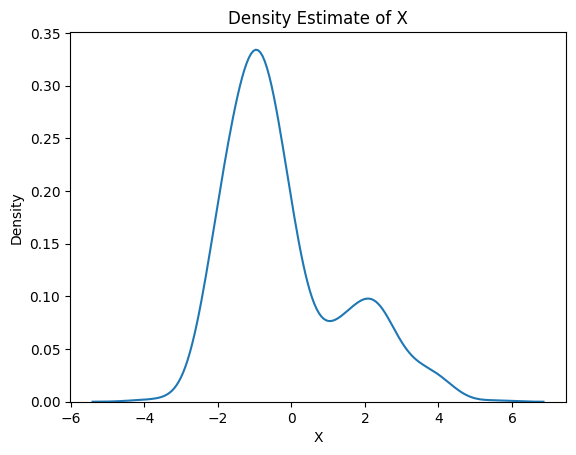

In [4]:
mu1, sigma1 = 2,1
mu2, sigma2 = -1,0.8
X1 = np.random.normal(mu1,sigma1,size=200)
X2 = np.random.normal(mu2,sigma2,size=600)
X = np.concatenate([X1,X2])

sns.kdeplot(X)
plt.xlabel('X')
plt.ylabel('Density')
plt.title('Density Estimate of X')
plt.show()

Step 3: Initialize parmaeters

In [8]:
mu1_hat, sigma1_hat =np.mean(X1), np.std(X1)
mu2_hat, sigma2_hat = np.mean(X2), np.std(X2)
pi1_hat, pi2_hat = len(X1)/len(X),len(X2)/len(X)


Step 4: Peform EM algoritm

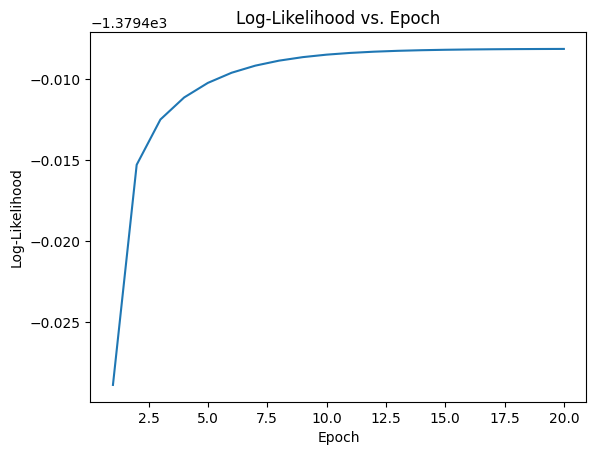

In [9]:
num_epochs = 20
log_likelihoods = []

for epoch in range(num_epochs):
    # E-step: Compute responsibilities
    gamma1 = pi1_hat * norm.pdf(X, mu1_hat, sigma1_hat)
    gamma2 = pi2_hat * norm.pdf(X, mu2_hat, sigma2_hat)
    total = gamma1 + gamma2
    gamma1 /= total
    gamma2 /= total

    # M-step: Update parameters
    mu1_hat = np.sum(gamma1 * X) / np.sum(gamma1)
    mu2_hat = np.sum(gamma2 * X) / np.sum(gamma2)
    sigma1_hat = np.sqrt(np.sum(gamma1 * (X - mu1_hat)**2) / np.sum(gamma1))
    sigma2_hat = np.sqrt(np.sum(gamma2 * (X - mu2_hat)**2) / np.sum(gamma2))
    pi1_hat = np.mean(gamma1)
    pi2_hat = np.mean(gamma2)

    # Compute log-likelihood
    log_likelihood = np.sum(np.log(pi1_hat * norm.pdf(X, mu1_hat, sigma1_hat)
                                   + pi2_hat * norm.pdf(X, mu2_hat, sigma2_hat)))
    log_likelihoods.append(log_likelihood)


plt.plot(range(1, num_epochs+1), log_likelihoods)
plt.xlabel('Epoch')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood vs. Epoch')
plt.show()